In [17]:
print('This is Social circles Facebook dataset having 4039 node')
print('also this is undirected graph')

This is Social circles Facebook dataset having 4039 node
also this is undirected graph


In [18]:
!wget http://snap.stanford.edu/data/facebook_combined.txt.gz
!gzip -d '/content/facebook_combined.txt.gz'

--2021-01-03 19:42:25--  http://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   997KB/s    in 0.2s    

2021-01-03 19:42:26 (997 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]

gzip: /content/facebook_combined.txt already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [19]:
edge_path='/content/facebook_combined.txt'

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [21]:
nodes=list(range(4039))
file = open(edge_path, 'r') 
lines = file.readlines()
integer=lambda x:[int(x[0]),int(x[1])]
edges=[integer(line.strip().split(' ')) for line in lines]

In [22]:
G=nx.from_edgelist(edges)

In [23]:
n_nodes=4039
n_edges=len(edges)
degrees = G.degree()
sum=0
deg_list=[]
n_people={}
for i in degrees:
  sum+=i[1]
  deg_list.append(i[1])
  try:n_people[i[1]]+=1
  except:n_people[i[1]]=1
average_degree=sum/len(degrees)

print('Number of nodes= ',n_nodes)
print('Number of edges= ',n_edges)
print('Average degree of graph= ',round(average_degree,2))

Number of nodes=  4039
Number of edges=  88234
Average degree of graph=  43.69


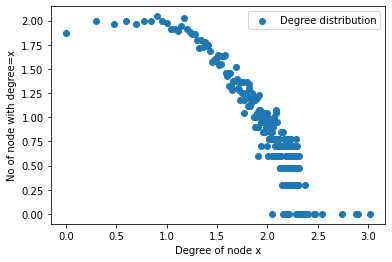

In [24]:
degree=[]
people=[]
log_degree=[]
log_people=[]
for k ,v in sorted(n_people.items(), key=lambda x: x[0]):
  degree.append(k)
  people.append(v)
  log_degree.append(np.log10(k))
  log_people.append(np.log10(v))

plt.scatter(log_degree,log_people,label='Degree distribution')
plt.legend()
plt.xlabel('Degree of node x')
plt.ylabel('No of node with degree=x')
plt.show()

In [25]:
print('Qumber of traingle in the graph = ',nx.triangles(G,0))

Qumber of traingle in the graph =  2519


In [26]:
if nx.is_connected(G):
  diameter = nx.diameter(G)
print('Diameter of the network is =',diameter)


Diameter of the network is = 8


In [27]:

n_components = nx.number_connected_components(G)
print('Number of components = ',n_components)

Number of components =  1


In [28]:

components = nx.connected_components(G)
largest_component = max(components, key=len)
print('Number of nodes in largest connected component = ',len(largest_component))

Number of nodes in largest connected component =  4039


In [29]:

clustering_coff=nx.clustering(G)
clustering_sum=0
#print(clustering_coff)
for k,v in clustering_coff.items():sum+=v
average_clustering_coff=sum/len(clustering_coff) 
print('Average clustring cofficient of the graph is = ',round(average_clustering_coff,2))

Average clustring cofficient of the graph is =  44.3
